In [161]:
import numpy
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


## READING IN THE IMAGE WITH CV

In [162]:
img = cv2.imread("./test_images/Buhari-4-1.png")

img.shape

(400, 700, 3)

## USING MATPLOTLIB TO PLOT THE IMAGE

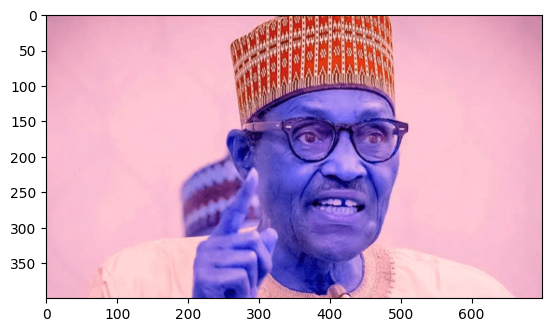

In [163]:
plt.imshow(img)

## TURNNING THE IMAGE TO GREYSCALE

In [164]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


gray_image.shape

(400, 700)

In [165]:
gray_image


array([[147, 147, 147, ..., 147, 157, 147],
       [147, 147, 157, ..., 147, 157, 147],
       [157, 157, 157, ..., 147, 147, 157],
       ...,
       [194, 188, 194, ..., 188, 188, 188],
       [194, 194, 194, ..., 188, 188, 188],
       [194, 188, 194, ..., 188, 188, 188]], dtype=uint8)

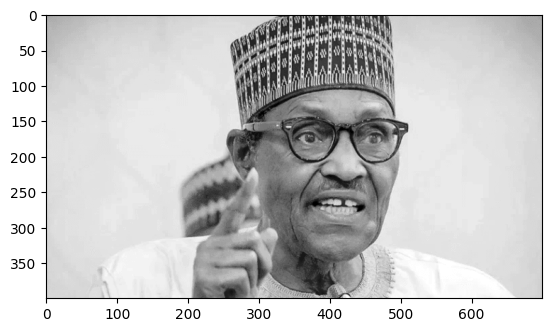

In [166]:
plt.imshow(gray_image, cmap="gray")

## DETECTING FACES

In [167]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray_image) 

faces
# returns a 2d array for the faces it finds, 
#if there are n faces, the lenght of the 2d array is n

array([[302,  82, 236, 236]])

In [168]:
(x_point, y_point , widht, height) = faces[0]
(x_point, y_point , widht, height)

(302, 82, 236, 236)

## CREATING THE RECTANGLE TO SHOW THE FACE IN THE IMAGE

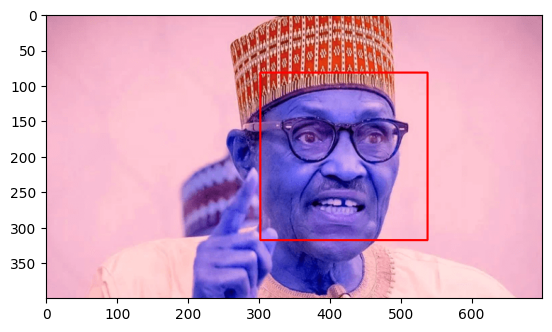

In [169]:
detect_face = cv2.rectangle(img, (x_point, y_point), (x_point + widht, y_point + height), (255, 0, 0), 2)
plt.imshow(detect_face)

## DETECTING EYES IN IMAGE

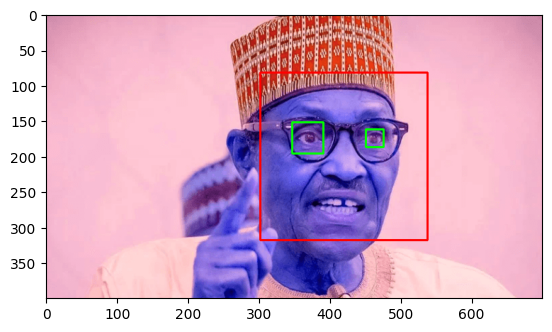

In [175]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    roi_gray = gray_image[y: y + h, x: x + w]
    
    roi_color = face_img[y: y + h, x: x + w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
    
    
plt.figure()
plt.imshow(face_img, cmap="gray")
plt.show()

## CROPPING THE IMAGE WE GET

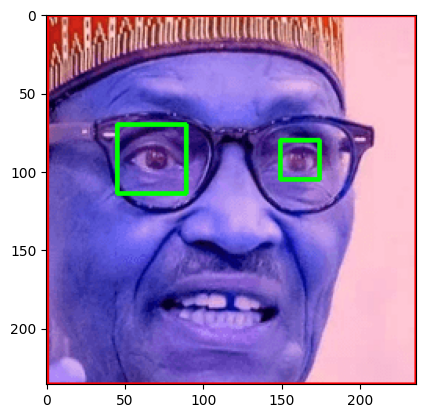

In [176]:
%matplotlib inline
plt.imshow(roi_color, cmap="gray") 